# **1. Single plot**

In [5]:
# main entrance 2-D T2-dist plotting

import numpy as np
import matplotlib.pyplot as plt
import os.path

import getBoreholeName as gbn
import interpolation as ip
import loadMat as lmat
import pltpcolormesh as pltpcm
%matplotlib inline

if __name__ =="__main__":    
    fileDir = 'D:/Woodland_NMR_Dart_Discus_June_Sep2016'
    saveFigDir = 'D:/Woodland_NMR_Dart_Discus_June_Sep2016/python/figures'
    # get names of all boreholes
    boreholeNames = gbn.getBoreholeName(fileDir)
    freqs = ['freq1', 'freq2']
    months = ['June','sep'] 
    # a_index = [(0,0),(0,1),(1,0),(1,1)]
    for i in range(len(boreholeNames)-12):    
        # for j in a_index:     
        fileName = boreholeNames[i] + '_' + freqs[1] + '_' + months[1]     
        path2MatFile = os.path.join(fileDir, fileName + '.mat')
        print("working on", fileName)
        # load mat file
        T2, depth, T2dist, T2ml = lmat.loadMat(path2MatFile)  

    #     T2_gd, depth_gd,T2dist_gd = ip.interpolation_griddata(T2, depth, T2dist)
    #     pltpcm.pltpcolormesh(T2_gd, depth_gd,T2dist_gd, fig)

        fig = plt.figure(figsize=(4,8))
        ax = fig.add_subplot(111)
        
        T2_RBS, depth_RBS,T2dist_RBS = ip.interpolation_RBS(T2, depth, T2dist)

        pbar = pltpcm.pltpcolormesh(T2_RBS, depth_RBS,T2dist_RBS, ax, T2dist_RBS.max())
        plt.colorbar(pbar)
        fig.tight_layout()
        
#         fig.savefig(os.path.join(saveFigDir, fileName + '.eps'))
#         fig.savefig(os.path.join(saveFigDir, fileName + '.png'), bbox_inches='tight')
#         fig.savefig(os.path.join(saveFigDir, boreholeNames[i] + '_' + freqs[1] + '.svg'), format='svg', dpi=1000)
        plt.close()

working on WO03109_freq2_sep
working on WO03118_freq2_sep
working on WO05117_freq2_sep
working on WO07111_freq2_sep


In [56]:
boreholeNames

['WO03109',
 'WO03118',
 'WO05117',
 'WO07111',
 'WO07116',
 'WO10112',
 'WO10115',
 'WO34113',
 'WO34114',
 'WO34118',
 'WO41112',
 'WO41115',
 'WO41117',
 'WO45116',
 'WO48110',
 'WO55109']

# **2. combine June and Sep plot**

In [54]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os.path
import matplotlib.gridspec as grid_spec

import getBoreholeName as gbn
import interpolation as ip
import loadMat as lmat
import pltpcolormesh as pltpcm
%matplotlib inline

if __name__ =="__main__":    
    fileDir = 'D:/Woodland_NMR_Dart_Discus_June_Sep2016'
    saveFigDir = 'D:/Woodland_NMR_Dart_Discus_June_Sep2016/python/figures'
    boreholeNames = gbn.getBoreholeName(fileDir)     # get names of all boreholes
    
    freqs = ['freq1', 'freq2']
    months = ['June','sep'] 
    # a_index = [(0,0),(0,1),(1,0),(1,1)]
    freq = freqs[0]

    for i in range(len(boreholeNames)): # transveral all boreholes       
        
        fig = plt.figure(figsize=(5,6)) 
        gs = grid_spec.GridSpec(ncols = len(months), nrows = 1)
        ax = []    
        T2 = []
        depth = []
        T2dist = []
        T2ml = []
        
        for j in range(len(months)): 
            # for j in a_index: 
            ax.append(fig.add_subplot(gs[0, j]))
            
            fileName = boreholeNames[i] + '_' + freq + '_' +  months[j]     
            path2MatFile = os.path.join(fileDir, fileName + '.mat')   
            
            print("working on %s"%fileName)
            # load mat file
            T2_mat, depth_mat, T2dist_mat, T2ml_mat = lmat.loadMat(path2MatFile)  
            T2.append(T2_mat)
            depth.append(depth_mat)
            T2dist.append(T2dist_mat)
            T2ml.append(T2ml_mat)
        # set the vmin(=0) and vmax values same in the colorbar for both June and Sep.T2-dist data
        T2dist_max = min(np.array(T2dist[0]).max(),np.array(T2dist[1]).max())
        T2dist_min = 0
        
        # another method to make a 2-D grid mesh
    #     T2_gd, depth_gd,T2dist_gd = ip.interpolation_griddata(T2, depth, T2dist)
    #     pltpcm.pltpcolormesh(T2_gd, depth_gd,T2dist_gd, fig)
        T2_June, depth_June,T2dist_June = ip.interpolation_RBS(T2[0], depth[0], T2dist[0])   
        # depth.shape = 11*1, need to transpose T2ml before plotting     
        # ax[0].plot(np.array(T2ml[0]).T, depth[0], color = 'g', lw = 3,alpha = 0.6)
        im_June = pltpcm.pltpcolormesh(T2_June, depth_June,T2dist_June, ax[0], T2dist_max)       
       
        T2_Sep, depth_Sep,T2dist_Sep = ip.interpolation_RBS(T2[1], depth[1], T2dist[1])        
        #ax[1].plot(np.array(T2ml[1]).T, depth[1], color = 'g', lw = 3,alpha = 0.6)        
        im_Sep = pltpcm.pltpcolormesh(T2_Sep, depth_Sep,T2dist_Sep, ax[1], T2dist_max)
        
        ax[0].set_title('June 2016',fontname="Arial", fontsize=13)      
        ax[1].get_yaxis().set_ticklabels([])
        ax[1].set_ylabel('')
        ax[1].set_title('September 2016',fontname="Arial", fontsize=13) 
        # add a colorbar
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
        cbar = fig.colorbar(im_Sep, cax=cbar_ax)
        cbar.set_label('Water content (%)',fontname="Arial", fontsize=12)
        cbar.ax.tick_params(labelsize= 10)
        
        fig.savefig(os.path.join(saveFigDir, boreholeNames[i] + '_' + freq + '.eps'),dpi=300)
        fig.savefig(os.path.join(saveFigDir, boreholeNames[i] + '_' + freq + '_T2dist.svg'), format='svg', dpi=1000)
#         fig.savefig(os.path.join(saveFigDir, boreholeNames[i] + '_' + freq + '.png'), bbox_inches='tight')
        plt.close()

working on WO03109_freq2_June
working on WO03109_freq2_sep
working on WO03118_freq2_June
working on WO03118_freq2_sep
working on WO05117_freq2_June
working on WO05117_freq2_sep
working on WO07111_freq2_June
working on WO07111_freq2_sep
working on WO07116_freq2_June
working on WO07116_freq2_sep
working on WO10112_freq2_June
working on WO10112_freq2_sep
working on WO10115_freq2_June
working on WO10115_freq2_sep
working on WO34113_freq2_June
working on WO34113_freq2_sep
working on WO34114_freq2_June
working on WO34114_freq2_sep
working on WO34118_freq2_June
working on WO34118_freq2_sep
working on WO41112_freq2_June
working on WO41112_freq2_sep
working on WO41115_freq2_June
working on WO41115_freq2_sep
working on WO41117_freq2_June
working on WO41117_freq2_sep
working on WO45116_freq2_June
working on WO45116_freq2_sep
working on WO48110_freq2_June
working on WO48110_freq2_sep
working on WO55109_freq2_June
working on WO55109_freq2_sep


# **3. WO07111-34114-07116**

working on WO07111_freq1_June
working on WO07111_freq1_sep
working on WO34114_freq1_June
working on WO34114_freq1_sep
working on WO10115_freq1_June
working on WO10115_freq1_sep


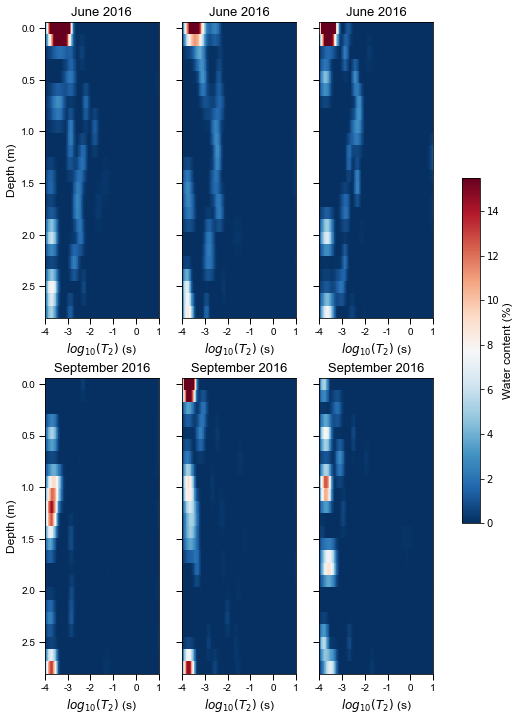

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os.path
import matplotlib.gridspec as grid_spec

import getBoreholeName as gbn
import interpolation as ip
import loadMat as lmat
import pltpcolormesh as pltpcm
%matplotlib inline

if __name__ =="__main__":    
    fileDir = 'D:/Woodland_NMR_Dart_Discus_June_Sep2016'
    saveFigDir = 'D:/Woodland_NMR_Dart_Discus_June_Sep2016/python/figures'
    boreholeNames = ['WO07111','WO34114','WO10115']    # plot boreholes WO07111-34114-10115
    #boreholeNames = ['WO07116','WO05117','WO03118']
    
    freqs = ['freq1', 'freq2']
    months = ['June','sep'] 

    freq = freqs[0] # use the low frequency freq2
    
    fig = plt.figure(figsize=(8,12)) 
    gs = grid_spec.GridSpec(ncols = len(boreholeNames), nrows = len(months))
    ax = []    
    T2 = []
    depth = []
    T2dist = []
    T2ml = []

    for i in range(len(boreholeNames)): # transveral boreholes WO07111-34114-07116
        for j in range(len(months)): 
            # for j in a_index: 
            ax.append(fig.add_subplot(gs[j, i]))
            
            fileName = boreholeNames[i] + '_' + freq + '_' +  months[j]     
            path2MatFile = os.path.join(fileDir, fileName + '.mat')   
            
            print("working on %s"%fileName)
            T2_mat, depth_mat, T2dist_mat, T2ml_mat = lmat.loadMat(path2MatFile)  # load mat file
            T2.append(T2_mat)
            depth.append(depth_mat)
            T2dist.append(T2dist_mat)
            T2ml.append(T2ml_mat)
    """
    set the vmin(=0) and vmax values in the colorbar for both June and Sep.T2-dist data
    choose the minima (of max value in each depth for each borehole)
    
    >> np.max(np.amax(np.array(T2dist[0]), axis = 0)) # max along the first axis(column)

        16.702778859675373

    >> np.max(np.amax(np.array(T2dist[1]), axis = 0))

        9.0570128443161

    >> [np.max(np.amax(np.array(T2dist[i]), axis = 0)) for i in range(6)]

        [16.702778859675373,
         9.0570128443161,
         8.902798917433353,
         7.11248406515018,
         11.86899593488198,
         9.958393065413993]
 """
    T2dist_max = min(np.max(np.amax(np.array(T2dist[i]), axis = 0)) for i in range(len(boreholeNames) * len(months))) 
    T2dist_min = 0
    
    for i in range(0, len(boreholeNames) * len(months), 2): 
        """
        plot the t2-dist of boreholes WO07111-34114-07116
        June on the first row while Sep on the second row
        start from (0, 0), then(1,0), (0, 1), (1, 1)...
        """
        T2_June, depth_June,T2dist_June = ip.interpolation_RBS(T2[i], depth[i], T2dist[i])   

        im_June = pltpcm.pltpcolormesh(T2_June, depth_June,T2dist_June, ax[i], T2dist_max)       

        T2_Sep, depth_Sep,T2dist_Sep = ip.interpolation_RBS(T2[i + 1], depth[i + 1], T2dist[i + 1])        
    
        im_Sep = pltpcm.pltpcolormesh(T2_Sep, depth_Sep,T2dist_Sep, ax[i + 1], T2dist_max)  
        
#         # plot the t2ml line
#         # depth.shape = 11*1, need to transpose T2ml before plotting     
#         ax[i].plot(np.array(T2ml[i]).T[1:], depth[i][1:], color = 'k', lw = 3,alpha = 0.6)
#         ax[i + 1].plot(np.array(T2ml[i + 1]).T[1:], depth[i + 1][1:], color = 'g', lw = 3,alpha = 0.6)  
        
        ax[i].set_title('June 2016',fontname="Arial", fontsize=13)
        ax[i + 1].set_title('September 2016',fontname="Arial", fontsize=13) 
        
        # delete y-label for columns other than the first
        if i != 0:
            ax[i].get_yaxis().set_ticklabels([])
            ax[i].set_ylabel('')  
            ax[i + 1].get_yaxis().set_ticklabels([])
            ax[i + 1].set_ylabel('')        
  
    # add a colorbar
    fig.subplots_adjust(right = 0.8)
    cbar_ax = fig.add_axes([0.85, 0.3, 0.03, 0.4]) # pos_x,pos_y , width,length
    cbar = fig.colorbar(im_Sep, cax = cbar_ax)
    cbar.set_label('Water content (%)',fontname="Arial", fontsize=12)
    cbar.ax.tick_params(labelsize= 10)
    
    # save the figure
    figName = ''.join([elem for elem in boreholeNames])
    fig.savefig(os.path.join(saveFigDir, figName + '_' + freq + '_T2dist.svg'), format='svg', dpi=1000)
    fig.savefig(os.path.join(saveFigDir, figName + '_' + freq + '_T2dist.png'), bbox_inches='tight')
    #plt.close()